#### DOMAIN: Industrial safety. NLP based Chatbot.

#### CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.


#### DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

#### Columns description:
‣ Data: timestamp or time/date information

‣ Countries: which country the accident occurred (anonymised)

‣ Local: the city where the manufacturing plant is located (anonymised)

‣ Industry sector: which sector the plant belongs to

‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)

‣ Genre: if the person is male of female

‣ Employee or Third Party: if the injured person is an employee or a third party

‣ Critical Risk: some description of the risk involved in the accident

‣ Description: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

In [ ]:
# # Create a virtual environment named "myenv"
# !python3 -m venv myenv

# # Activate the virtual environment
# !source myenv/bin/activate

# # Install packages within the virtual environment (replace 'package_name' with the actual package name)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns=None
pd.options.display.max_rows=None

import warnings
warnings.filterwarnings ('ignore')
!pip install autocorrect
!pip install unidecode

from autocorrect import Speller

# Contractions library is used to expand short type words
!pip install contractions
import contractions

# Helps to remove the punctuation
import string

# Helps to create the counter
from collections import Counter

# Importing the vectorization classes
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, strip_accents_ascii, strip_accents_unicode, strip_tags


# Importing the Ensemble model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from spacy import tokenizer, vectors

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup

# !pip install tqdm
from tqdm import tqdm

# Install vader sentiment package
!pip install vaderSentiment

# Install textblob package
!pip install textblob
!pip install hmmlearn
from tensorflow.keras.utils import plot_model
# gensim have multiple pretrained model that can be used for embedding based on type of fault
# !pip install --user gensim==3.8.3

# Used to create the Sequential model
from keras.models import Sequential
import tensorflow as tf
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow import keras
from tensorflow.keras import layers, activations, initializers, utils, datasets, losses, preprocessing, optimizers
#Supervised learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image
# Helped to create train and test data
from sklearn.model_selection import train_test_split, cross_val_score

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
stop_words = stopwords.words('english')

import holidays

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from tensorflow.keras.regularizers import l2
from sklearn.linear_model import Ridge
from tensorflow.keras.constraints import UnitNorm,unit_norm
from tensorflow.keras.layers import Dropout, BatchNormalization
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, confusion_matrix, r2_score
import os
from tensorflow.keras.optimizers import SGD, Adagrad, Adagrad, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.linear_model import Ridge
from tensorflow.keras.constraints import UnitNorm,unit_norm
from sklearn import metrics


In [2]:
!pip install --upgrade pip
!pip install --upgrade setuptools
# sudo apt-get install build-essential
!pip install gensim



  Using cached pip-23.2.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-dev-tools 2023.3.24 requires pip<23,>=22, but you have pip 23.2.1 which is incompatible.
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
  Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.0.0
    Uninstalling setuptools-68.0.0:
      Successfully uninstalled setuptools-68.0.0
ERROR: pip's dependency resolver


### • PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description.



### 1. Milestone 1: [ Score: 40 points ]

‣ Input: Context and Dataset

‣ Process:

‣ Step 1: Import the data [ 3 points ]

‣ Step 2: Data cleansing [ 5 points ]

‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

‣ Step 6: Interim report [ 10 points ]

#### DOMAIN: Industrial safety. NLP based Chatbot.

#### CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.


#### DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

#### Columns description:
‣ Data: timestamp or time/date information

‣ Countries: which country the accident occurred (anonymised)

‣ Local: the city where the manufacturing plant is located (anonymised)

‣ Industry sector: which sector the plant belongs to

‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)

‣ Genre: if the person is male of female

‣ Employee or Third Party: if the injured person is an employee or a third party

‣ Critical Risk: some description of the risk involved in the accident

‣ Description: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

In [14]:
#from google.colab import drive
#drive.mount('/content/drive/')


In [11]:
# updating the path pof dataset
dataset ="/Users/apple/Github/NLP/NLP_Milestone/untitled folder/Data Set - industrial_safety_and_health_database_with_accidents_description.csv"

In [12]:
# lets import the data
data = pd.read_csv(dataset)

In [13]:
# letrs check our data

data

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


### Step 2: Data cleansing [ 5 points ]

In [15]:
# seems Col-"Unnamed" is parralel index that is adding no value. Hence dropping Unnamed

data =data.drop (['Unnamed: 0'], axis=1)

In [16]:
# Renaming columns so we can understand it better- 'Data', 'Countries', 'Genre', 'Employee or Third Party'
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)


In [17]:
data.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description'],
      dtype='object')

In [18]:
# let check the duplicates
data.duplicated().sum()

7

In [19]:
data = data.drop_duplicates()

In [20]:
# Get the shape of Industry data
data.shape

(418, 10)

In [22]:
# Check unique values of all columns except 'Description' column
for x in data.columns:
    if x != 'Description':
      print('--'*50); print('Unique values of "{x}" column'); print('--'*50)
      print(data[x].unique())
      print('\n')


----------------------------------------------------------------------------------------------------
Unique values of "{x}" column
----------------------------------------------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02

* We observed that there are records of accidents from 1st Jan 2016 to 9th July 2017 in every month. So there are no outliers in the 'Date' column.

* There are only three country types so there are no outliers in 'Country' column.

* There are 12 Local cities where manufacturing plant is located and it's types are in sequence so there are no outliers in 'Local' column.

* There are only three Industry Sector types which are in sequence so there are no outliers in 'Industry Sector' column.

* There are only five Accident Level types which are in sequence so there are no outliers in 'Accident Level' column.

* There are only six Potential Accident Level types which are in sequence so there are no outliers in 'Potential Accident Level' column.

* There are only two Gender types in the provided data so there are no outliers in 'Gender' column.

* There are only three Employee types in the provided data so there are no outliers in 'Gender' column.

* There are quite a lot of Critical risk descriptions and we don't see any outliers but with the help of SME we can decide whether this column has outliers or not.

In [23]:
# outliars can be verified with 5 point summary as well

data.describe()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
count,418,418,418,418,418,418,418,418,418,418
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,6,248,89,237,309,141,396,185,229,2


In [24]:
# lets check the missing values as well

data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

Summary :

Removed 'Unnamed: 0' column and renamed - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in the dataset.

Duplicates dropped

There are no outliers in the dataset

No missing values in dataset

Data Shape: 418 rows and 10 columns after data cleansing.

Lets do the feature engineering

In [25]:
# we have the Time feature lets check this

data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data.Date.apply(lambda x : x.year)
data['Month'] = data.Date.apply(lambda x : x.month)
data['Day'] = data.Date.apply(lambda x : x.day)
data['Weekday'] = data.Date.apply(lambda x : x.day_name())
data['WeekofYear'] = data.Date.apply(lambda x : x.weekofyear)

data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


Lets consider what could impact the work in plants and cause the Accident-

1. staffing and availability of resources: When staffing is less and resources not available, this kind of conditions lead to unplanned events like- slow production, poor quality of products and accidents etc.

2. Time/Period of the year/month: This is a factor to consider as During festive or holiday period the production impacted a lot due to high demand and low staffing, this can also lead towards the condition of accidents as staff has to do mire work to compensate the less manpower.

3. Seasons as these impacts the industries : Different seasons have different impact on the production, could be possible that unlikely situations occur due to season and wether that may lead production disturb and may cause accidents too.


Let us consider the seasons to unders tand their impact on industry and accidents

https://seasonsyear.com/Brazil

Spring : September to November

Summer : December to February

Autumn : March to May

Winter : June to August

In [26]:
# function to create month variable into seasons
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [27]:
data['Season'] = data['Month'].apply(month2seasons)
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer


We can create holidays variable based on Brazil holidays list from 2016 and 2017.


In [30]:
!pip install holidays

  Obtaining dependency information for holidays from https://files.pythonhosted.org/packages/2b/21/12a180f7dc75758d466ff1eeaef894504320d9af4fd48d50080129f5538d/holidays-0.34-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 14.0 MB/s eta 0:00:00a 0:00:01


In [31]:
import holidays

brazil_holidays = []

print('--'*40); print('List of Brazil holidays in 2016'); print('--'*40)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print('--'*40); print('List of Brazil holidays in 2017'); print('--'*40)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Confraternização Universal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia do Trabalhador')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
--------------------------------------------------------------------------------
(datetime.date(2017, 1, 1), 'Confraternização Universal')
(datetime.date(2017, 4, 14), 'Sexta-feira Santa')
(datetime.date(2017, 4, 21), 'Tiradentes')
(datetime.d

In [32]:
# Now, lets check if any accident happened on Holiday

data['Is_Holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in data['Date']]
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0


### Lets do the EDA

Univariate analysis

Feature - Country

------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%
------------------------------------------------------------
Distributon of `Country` label
------------------------------------------------------------


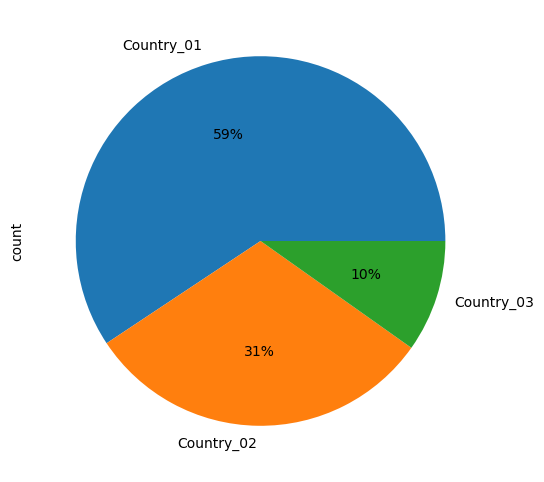

In [33]:
print('--'*30); print('Value Counts for `Country` label'); print('--'*30)

total_row_cnt = data.shape[0]
country_01_cnt = data[data.Country == 'Country_01'].shape[0]
country_02_cnt = data[data.Country == 'Country_02'].shape[0]
country_03_cnt = data[data.Country == 'Country_03'].shape[0]

print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Country` label'); print('--'*30)
_ = data['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))

Feature - Local

In [35]:
!pip install holoviews 

  Obtaining dependency information for holoviews from https://files.pythonhosted.org/packages/90/4a/6e78bb099659c3d359f1f388c06b17bf344ceaddb2a3ad63b0ce87191cde/holoviews-1.17.1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 2.9 MB/s eta 0:00:00
  Obtaining dependency information for pyviz-comms>=0.7.4 from https://files.pythonhosted.org/packages/67/bc/f698554d2a179c3ae40adba328db1bc552c0ea5832101503200ab1904dd8/pyviz_comms-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for panel>=0.13.1 from https://files.pythonhosted.org/packages/ef/3b/d5b3596e11dd485c8276a5e9143dbdeea6a80f6d8df952e947644eb57b36/panel-1.2.3-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 31.0 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for xyzservices>=2021.09.1 from https://files.pythonhosted.org/packages/b1/2b/

In [39]:
import holoviews as hv
from holoviews import opts

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
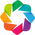

:Bars   [Local]   (proportion)

In [40]:
local_cnt = np.round(data['Local'].value_counts(normalize=True) * 100)

hv.extension('bokeh')
hv.Bars(local_cnt).opts(title="Local Count", color="#8888ff", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300,tools=['hover'],show_grid=True))


We can visualize that the count of plants are high in locality 3, the locality 5, 1 and 4 are having almost same number of plants and these are jointly consider at 2nd position.


Feature- Industry Sector

In [41]:
print('--'*30); print('Value Counts for `Industry Sector` label'); print('--'*30)

Mining_cnt = data[data['Industry Sector'] == 'Mining'].shape[0]
Metals_cnt = data[data['Industry Sector'] == 'Metals'].shape[0]
Others_cnt = data[data['Industry Sector'] == 'Others'].shape[0]

print(f'Mining count: {Mining_cnt} i.e. {round(Mining_cnt/total_row_cnt*100, 0)}%')
print(f'Metals count: {Metals_cnt} i.e. {round(Metals_cnt/total_row_cnt*100, 0)}%')
print(f'Others count: {Others_cnt} i.e. {round(Others_cnt/total_row_cnt*100, 0)}%')



------------------------------------------------------------
Value Counts for `Industry Sector` label
------------------------------------------------------------
Mining count: 237 i.e. 57.0%
Metals count: 134 i.e. 32.0%
Others count: 47 i.e. 11.0%


57% manufacturing plants belongs to Mining sector.

32% manufacturing plants belongs to Metals sector.

11% manufacturing plants belongs to Others sector.

### Feature- Accident Level

In [42]:
print('--'*30); print('Value Counts for `Accident Level` label'); print('--'*40)

I_acc_cnt = data[data['Accident Level'] == 'I'].shape[0]
II_acc_cnt = data[data['Accident Level'] == 'II'].shape[0]
III_acc_cnt = data[data['Accident Level'] == 'III'].shape[0]
IV_acc_cnt = data[data['Accident Level'] == 'IV'].shape[0]
V_acc_cnt = data[data['Accident Level'] == 'V'].shape[0]
VI_acc_cnt = data[data['Accident Level'] == 'VI'].shape[0]

print(f'Accident Level - I count: {I_acc_cnt} i.e. {round(I_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - II count: {II_acc_cnt} i.e. {round(II_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - III count: {III_acc_cnt} i.e. {round(III_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - IV count: {IV_acc_cnt} i.e. {round(IV_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - V count: {V_acc_cnt} i.e. {round(V_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - VI count: {VI_acc_cnt} i.e. {round(VI_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

I_pot_acc_cnt = data[data['Potential Accident Level'] == 'I'].shape[0]
II_pot_acc_cnt = data[data['Potential Accident Level'] == 'II'].shape[0]
III_pot_acc_cnt = data[data['Potential Accident Level'] == 'III'].shape[0]
IV_pot_acc_cnt = data[data['Potential Accident Level'] == 'IV'].shape[0]
V_pot_acc_cnt = data[data['Potential Accident Level'] == 'V'].shape[0]
VI_pot_acc_cnt = data[data['Potential Accident Level'] == 'VI'].shape[0]

print(f'Potential Accident Level - I count: {I_pot_acc_cnt} i.e. {round(I_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - II count: {II_pot_acc_cnt} i.e. {round(II_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - III count: {III_pot_acc_cnt} i.e. {round(III_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - IV count: {IV_pot_acc_cnt} i.e. {round(IV_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - V count: {V_pot_acc_cnt} i.e. {round(V_pot_acc_cnt/total_row_cnt*100, 0)}%')

print(f'Potential Accident Level - VI count: {VI_pot_acc_cnt} i.e. {round(VI_pot_acc_cnt/total_row_cnt*100, 0)}%')

# print('--'*30); print('Distributon of `Accident Level` & `Potential Accident Level` label'); print('--'*40)

# ac_level_cnt = np.round(data['Accident Level'].value_counts(normalize=True) * 100)
# pot_ac_level_cnt = np.round(data['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
# ac_pot = pd.concat([ac_level_cnt, pot_ac_level_cnt], axis=1,sort=False).fillna(0).rename(columns={'Accident Level':'Accident', 'Potential Accident Level':'Potential'})
# ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})



------------------------------------------------------------
Value Counts for `Accident Level` label
--------------------------------------------------------------------------------
Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Value Counts for `Potential Accident Level
--------------------------------------------------------------------------------
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 30 i.e. 7.0%
Potential Accident Level - VI count: 1 i.e. 0.0%


The number of accidents decreases as the Accident Level increases. so the high level accidents are low in count as those are major issue and companies putting more efforts and safety measures in place to stop or prevent such cases. But, the low level accidents are high in number, these are need to be checked to avoid all such issues.

The number of accidents increases as the Potential Accident Level increases.

### Feature- Gender

In [43]:
print('--'*30); print('Value Counts for `Gender` label'); print('--'*30)

Male_cnt = data[data['Gender'] == 'Male'].shape[0]
Female_cnt = data[data['Gender'] == 'Female'].shape[0]

print(f'Male count: {Male_cnt} i.e. {round(Male_cnt/total_row_cnt*100, 0)}%')
print(f'Female count: {Female_cnt} i.e. {round(Female_cnt/total_row_cnt*100, 0)}%')




------------------------------------------------------------
Value Counts for `Gender` label
------------------------------------------------------------
Male count: 396 i.e. 95.0%
Female count: 22 i.e. 5.0%


Observation s: There are more men working in this industry as compared to women.

### Feature - Employee type

In [44]:
print('--'*30); print('Value Counts for `Employee type` label'); print('--'*30)

third_party_cnt = data[data['Employee type'] == 'Third Party'].shape[0]
emp_cnt = data[data['Employee type'] == 'Employee'].shape[0]
third_rem_cnt = data[data['Employee type'] == 'Third Party (Remote)'].shape[0]

print(f'Third Party count: {third_party_cnt} i.e. {round(third_party_cnt/total_row_cnt*100, 0)}%')
print(f'Employee count: {emp_cnt} i.e. {round(emp_cnt/total_row_cnt*100, 0)}%')
print(f'Third Party (Remote) count: {third_rem_cnt} i.e. {round(third_rem_cnt/total_row_cnt*100, 0)}%')

------------------------------------------------------------
Value Counts for `Employee type` label
------------------------------------------------------------
Third Party count: 185 i.e. 44.0%
Employee count: 178 i.e. 43.0%
Third Party (Remote) count: 55 i.e. 13.0%


Observations:
44% Third party empoyees working in this industry.

43% own empoyees working in this industry.

13% Third party(Remote) empoyees working in this industry.

### Feature - Critical Risk

In [45]:
cr_risk_cnt = np.round(data['Critical Risk'].value_counts(normalize=True) * 100)
print (cr_risk_cnt)

Critical Risk
Others                                       55.0
Pressed                                       6.0
Manual Tools                                  5.0
Chemical substances                           4.0
Cut                                           3.0
Venomous Animals                              3.0
Projection                                    3.0
Bees                                          2.0
Fall                                          2.0
Vehicles and Mobile Equipment                 2.0
Fall prevention (same level)                  2.0
remains of choco                              2.0
Pressurized Systems                           2.0
Fall prevention                               1.0
Suspended Loads                               1.0
Blocking and isolation of energies            1.0
Pressurized Systems / Chemical Substances     1.0
Power lock                                    1.0
Liquid Metal                                  1.0
Machine Protection                  

Because most part of the Critical Risks are classified as 'Others', it is thought that there are too many risks to classify precisely.

And it is also thought that it takes so much time to analyze risks and reasons why the accidents occur.

In [48]:
year_cnt = np.round(data['Year'].value_counts(normalize=True,sort=False) * 100)
#print (year_cnt)

month_cnt = np.round(data['Month'].value_counts(normalize=True,sort=False) * 100)
#print (month_cnt)
day_cnt = np.round(data['Day'].value_counts(normalize=True,sort=False) * 100)
#print (day_cnt)
weekday_cnt = pd.DataFrame(np.round(data['Weekday'].value_counts(normalize=True,sort=False) * 100))
weekday_cnt['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekday_cnt.index]
weekday_cnt.sort_values('week_num', inplace=True)
#print (weekday_cnt)



### Bivariate Analysis and Hypothesis testing

a. Industry Sector by Countries - Is the distribution of industry sector different significantly in differ countries or not?

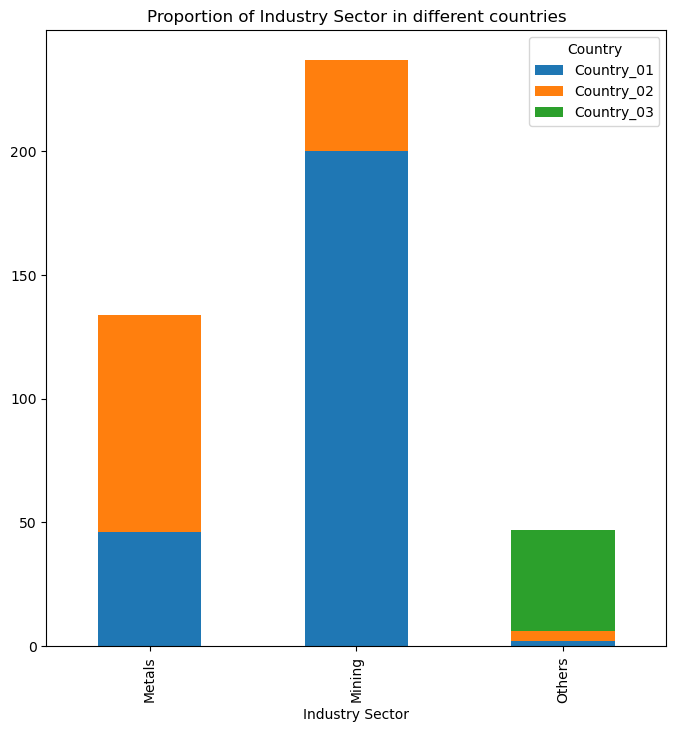

In [49]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = data['Industry Sector'], columns = data['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

Observations

Metals and Mining industry sector plants are not available in Country_03.

Distribution of industry sector differ significantly in each country. But let's check the proportion of metals, mining and others sector in Country_01 and is that difference is statistically significant?

### Let us perform the hypothesis test to understand the condition better-

1. State the H0 and Ha

Ho = The proportions of industry sector is not differ in different countries

Ha = The proportions of industry sector is differ in different countries

2. Decide the significance level: alpha = 0.05

3. Identify the test-statistic: Z-test of proportions

4. Calculate the p_value using test-statistic

In [50]:
mining_country1 = data[data['Industry Sector'] == 'Mining']['Country'].value_counts()[0]
mining_country2 = data[data['Industry Sector'] == 'Mining']['Country'].value_counts()[1]

metals_country1 = data[data['Industry Sector'] == 'Metals']['Country'].value_counts()[1]
metals_country2 = data[data['Industry Sector'] == 'Metals']['Country'].value_counts()[0]

others_country1 = data[data['Industry Sector'] == 'Others']['Country'].value_counts()[2]
others_country2 = data[data['Industry Sector'] == 'Others']['Country'].value_counts()[1]
others_country3 = data[data['Industry Sector'] == 'Others']['Country'].value_counts()[0]

print([mining_country1, metals_country1, others_country1], [country_01_cnt])
print(f'Proportions of mining, metals, others in country_01 = {round(200/248,2)}%, {round(46/248,2)}%, {round(2/248,2)}% respectively')

[200, 46, 2] [248]
Proportions of mining, metals, others in country_01 = 0.81%, 0.19%, 0.01% respectively


In [51]:
from statsmodels.stats.proportion import proportions_ztest

# Z-test proportions: More than 2 samples not implemented yet, hence I am passing two elements
t_statistic, p_value = proportions_ztest([mining_country1, metals_country1], [country_01_cnt])

print("Mining and Metals t_statistic", t_statistic)
print("Mining and Metals p_value", p_value)

t_statistic, p_value = proportions_ztest([mining_country1, others_country1], [country_01_cnt])

print("Mining and Others t_statistic", t_statistic)
print("Mining and Others p_value", p_value)

Mining and Metals t_statistic 13.830057992106923
Mining and Metals p_value 1.6788511371823555e-43
Mining and Others t_statistic 18.094920466702863
Mining and Others p_value 3.494480338628687e-73


In [52]:
# Decide to Reject or Accept Null Hypothesis

reject_null = False
if p_value < 0.05:
    reject_null = True
else:
    reject_null = False

print("reject null? : " + str(reject_null))

reject null? : True


Observations :

Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from metals sector

Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from others sector

#### Lets check Employee type by Gender - If the distribution of employee type differ significantly in different genders

In [53]:
f = lambda x : np.round(x/x.sum() * 100)
Gender = data.groupby(['Gender','Employee type'])['Employee type'].count().unstack().apply(f, axis=1)
print (Gender)

Employee type  Employee  Third Party  Third Party (Remote)
Gender                                                    
Female             36.0         41.0                  23.0
Male               43.0         44.0                  13.0


Observations :

Proportion of third party employees in each gender is equal.

Proportion of third party(remote) employees in each gender is not equal.

Proportion of own employees in each gender is not equal. But let's check is that difference is statistically significant?

### Lets set another hypothesis to check the data -

1. State the H0 and Ha

Ho = The proportions of own employees in each gender is equal.

Ha = The proportions of own employees in each gender is not equal.

2. Decide the significance level: alpha = 0.05

3. Identify the test-statistic: Z-test of proportions

4. Calculate the p_value using test-statistic

In [54]:
male_emp = data[data['Employee type'] == 'Employee'].Gender.value_counts()[0]
female_emp = data[data['Employee type'] == 'Employee'].Gender.value_counts()[1]

print([male_emp, female_emp], [Male_cnt, Female_cnt])
print(f'Proportion of own employee types in male, female = {round(170/396,2)}%, {round(8/22,2)}% respectively')

[170, 8] [396, 22]
Proportion of own employee types in male, female = 0.43%, 0.36% respectively


In [55]:
t_statistic, p_value = proportions_ztest([male_emp, female_emp], [Male_cnt, Female_cnt])

print("t_statistic", t_statistic)
print("p_value", p_value)

t_statistic 0.6061911815982839
p_value 0.5443878078917722


In [56]:
# Decide to Reject or Accept Null Hypothesis

reject_null = False
if p_value < 0.05:
    reject_null = True
else:
    reject_null = False

print("reject null? : " + str(reject_null))

reject null? : False


Observations :
Hence we fail to reject Null Hypothesis, we have enough (95%) evidence to prove that, the proportion of own employees in each gender is equal.

#### Lets check industry Sector by Gender - Is the distribution of industry sector differ significantly in different genders?

In [57]:
f = lambda x : np.round(x/x.sum() * 100)
Gender = data.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)
print (Gender)

Industry Sector  Metals  Mining  Others
Gender                                 
Female             59.0    23.0    18.0
Male               31.0    59.0    11.0


Observations

Proportion of Metals sector employees in each gender is not equal.

Proportion of Mining sector employees in each gender is not equal.

Proportion of Others sector employees in each gender is not equal.

### Lets check Accident Levels by Gender - Is the distribution of accident levels and potential accident levels differ significantly in different genders?

In [58]:
f = lambda x : np.round(x/x.sum() * 100)

Accident_Gender = data.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
print (Accident_Gender)
potntial_accident_gender = data.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
print (potntial_accident_gender)

Accident Level     I    II  III   IV    V
Gender                                   
Female          82.0  14.0  5.0  NaN  NaN
Male            73.0   9.0  8.0  8.0  2.0
Potential Accident Level     I    II   III    IV    V   VI
Gender                                                    
Female                     NaN  64.0  14.0  18.0  5.0  NaN
Male                      11.0  20.0  26.0  35.0  7.0  0.0


Observations:

Proportion of accident levels in each gender is not equal and males have a higher accident levels than females.

There are many low risks at general accident level, but many high risks at potential accident level.

### Lets check Accident Levels by Employee type - Is the distribution of accident levels and potential accident levels differ significantly in different employee types?

In [59]:
f = lambda x : np.round(x/x.sum() * 100)

Accident_employee = data.groupby(['Employee type','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
print (Accident_employee)
potential_accident_employee = data.groupby(['Employee type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
print (potential_accident_employee)

Accident Level           I    II  III   IV    V
Employee type                                  
Employee              78.0   8.0  8.0  6.0  NaN
Third Party           70.0  10.0  8.0  9.0  3.0
Third Party (Remote)  73.0  11.0  5.0  7.0  4.0
Potential Accident Level     I    II   III    IV    V   VI
Employee type                                             
Employee                   7.0  25.0  30.0  33.0  6.0  NaN
Third Party               16.0  20.0  19.0  37.0  8.0  1.0
Third Party (Remote)       7.0  25.0  33.0  27.0  7.0  NaN


Observations

For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

### Lets check Accident Levels by Month - Is the distribution of accident levels and potential accident levels differ significantly in different months?

In [60]:
f = lambda x : np.round(x/x.sum() * 100)

accident_month = data.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
print (accident_month)
potential_accident_month = data.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
print (potential_accident_month)

Accident Level     I    II   III    IV    V
Month                                      
1               82.0   5.0   5.0   5.0  3.0
2               69.0  15.0   7.0   8.0  2.0
3               68.0  14.0   6.0   6.0  6.0
4               84.0   4.0   6.0   6.0  0.0
5               78.0   8.0   2.0  10.0  2.0
6               80.0   6.0   4.0   8.0  2.0
7               67.0   4.0  17.0   8.0  4.0
8               71.0  14.0  10.0   5.0  0.0
9               75.0  12.0   8.0   4.0  0.0
10              52.0  19.0  19.0  10.0  0.0
11              69.0   8.0   8.0  15.0  0.0
12              74.0   9.0  13.0   4.0  0.0
Potential Accident Level     I    II   III    IV     V   VI
Month                                                      
1                         10.0   8.0  41.0  38.0   0.0  3.0
2                         10.0  23.0  25.0  31.0  11.0  0.0
3                         12.0  14.0  26.0  32.0  16.0  0.0
4                          8.0  25.0  27.0  29.0  10.0  0.0
5                       

Observations

Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

### Lets check Accident Levels by Weekday - Is the distribution of accident levels and potential accident levels differ significantly in different weekday?


In [61]:
f = lambda x : np.round(x/x.sum() * 100)

accident_weekday = data.groupby(['Weekday','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
accident_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in accident_weekday.index]
accident_weekday.sort_values('week_num', inplace=True)
accident_weekday.drop('week_num', axis=1, inplace=True)
print (accident_weekday)
potential_accident_weekday = data.groupby(['Weekday','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
potential_accident_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in potential_accident_weekday.index]
potential_accident_weekday.sort_values('week_num', inplace=True)
potential_accident_weekday.drop('week_num', axis=1, inplace=True)
print (potential_accident_weekday)

Accident Level     I    II   III    IV    V
Weekday                                    
Monday          70.0  13.0  17.0   0.0  0.0
Tuesday         78.0   7.0   3.0  12.0  0.0
Wednesday       74.0  15.0   3.0   2.0  6.0
Thursday        86.0   4.0   3.0   8.0  0.0
Friday          72.0  11.0   7.0  10.0  0.0
Saturday        61.0  12.0  12.0   7.0  7.0
Sunday          71.0   5.0  12.0  12.0  0.0
Potential Accident Level     I    II   III    IV     V     VI
Weekday                                                      
Monday                     7.0  14.0  13.0  16.0   3.0    0.0
Tuesday                   18.0  20.0  15.0  16.0  13.0    0.0
Wednesday                 27.0  11.0  17.0  11.0  17.0  100.0
Thursday                  20.0  22.0  19.0  16.0  13.0    0.0
Friday                    11.0  15.0  12.0  16.0  23.0    0.0
Saturday                  16.0   8.0  12.0  14.0  27.0    0.0
Sunday                     2.0  11.0  11.0  12.0   3.0    0.0


Observations

Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.

#### lets check  Accident Levels by Seasons - Is the distribution of accident levels and potential accident levels differ significantly in different seasons?


In [62]:
f = lambda x : np.round(x/x.sum() * 100)
accident_season = data.groupby(['Season','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
accident_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in accident_season.index]
accident_season.sort_values('season_num', inplace=True)
accident_season.drop('season_num', axis=1, inplace=True)

print (accident_season)
potential_accident_season = data.groupby(['Season','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
potential_accident_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in potential_accident_season.index]
potential_accident_season.sort_values('season_num', inplace=True)
potential_accident_season.drop('season_num', axis=1, inplace=True)
print (potential_accident_season)


Accident Level     I    II   III   IV    V
Season                                    
Spring          66.0  14.0  12.0  9.0  0.0
Summer          74.0  11.0   7.0  7.0  2.0
Autumn          77.0   9.0   5.0  7.0  3.0
Winter          75.0   7.0   8.0  7.0  2.0
Potential Accident Level     I    II   III    IV     V     VI
Season                                                       
Spring                    13.0  19.0   9.0  16.0   3.0    0.0
Summer                    22.0  26.0  35.0  30.0  27.0  100.0
Autumn                    38.0  27.0  35.0  31.0  57.0    0.0
Winter                    27.0  27.0  21.0  23.0  13.0    0.0


Observations

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

#### Study Summary Statistics

In [63]:
# Summary statistics
data.drop(columns='Description').describe(exclude=[np.number]).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
Date,418,NaN,NaN,NaN,2016-09-18 20:50:31.578947328,2016-01-01,2016-04-30 06:00:00,2016-09-06,2017-02-06 12:00:00,2017-07-09
Country,418,3,Country_01,248,NaT,NaT,NaT,NaT,NaT,NaT
Local,418,12,Local_03,89,NaT,NaT,NaT,NaT,NaT,NaT
Industry Sector,418,3,Mining,237,NaT,NaT,NaT,NaT,NaT,NaT
Accident Level,418,5,I,309,NaT,NaT,NaT,NaT,NaT,NaT
Potential Accident Level,418,6,IV,141,NaT,NaT,NaT,NaT,NaT,NaT
Gender,418,2,Male,396,NaT,NaT,NaT,NaT,NaT,NaT
Employee type,418,3,Third Party,185,NaT,NaT,NaT,NaT,NaT,NaT
Critical Risk,418,33,Others,229,NaT,NaT,NaT,NaT,NaT,NaT
Weekday,418,7,Thursday,76,NaT,NaT,NaT,NaT,NaT,NaT


#### Lets check correlation


In [65]:
# Summary statistics
#data.corr()

Observations

WeekofYear featuer is having very high positive correlation with Month feature.

### We have done good amount of EDA, now lets summarize this and check our results and conclusions

#### EDA Summary:



**Local**
* Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.

**Country**
* Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.

**Industry Sector**
* Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.

**Country + Industry Sector**
* Metals and Mining industry sector plants are not available in Country_03.
* Distribution of industry sector differ significantly in each country.

**Accident Levels**
* The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.

**Gender**
* There are more men working in this industry as compared to women.

**Employee type**
* 44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.

**Gender + Employee type**
* Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and
own employees in each gender is not equal.

**Gender + Industry Sector**
* Proportion of Metals, Mining and Others sector employees in each gender is not equal

**Gender + Accident Levels**
* Males have a higher accident levels than females.
* There are many low risks at general accident level, but many high risks at potential accident level.

**Accident Levels + Employee type**
* For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be
slightly higher at high accident levels.

**Accident Levels + Calendar**
* Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
* Number of accidents are high in beginning of the year and it keeps decreasing later.
* Number of accidents are very high in particular days like 4, 8 and 16 in every month.
* Number of accidents increased during the middle of the week and declined since the middle of th week.

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much,
and some of these levels increased slightly in the second half of the year.
* Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not
changed much.

**Critical Risk**
* Most of the critical risks are classified as Others.

# Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

In [66]:
data.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description', 'Year', 'Month', 'Day', 'Weekday', 'WeekofYear',
       'Season', 'Is_Holiday'],
      dtype='object')

In [67]:
# lets check some random samples from our data to understand what the text cleaning is need to apply
sample_discription = data[['Description','Accident Level']]
sample_discription.sample(10)

,Description,Accident Level
52,In circumstances that two workers of the compa...,I
337,"In the support process, in circumstances that ...",I
78,"When accessing the Santa do Novo area, in orde...",II
83,The worker carried out the disassembly of 03 s...,I
133,During the process of washing the material (Be...,I
147,During the activity of construction of wall st...,I
350,At Level 3970 (Before -100) When the F6M 801 l...,I
368,Employee to perform painting of the floor of t...,I
212,"In the city of Conchucos, of Ancash, participa...",III
168,Being 10:25 h approx. hours the operator Ferna...,III


with the above sample , we can make following inference about the text data -

1. text is in both Lower and upper case, so we need to lower case the texts.

2. Numbers are there in the examples these numbers can be removed

3. There are many stop words that can be removed, but as we are creating a Chatbot hence the meaningful text matters here. I'm removing the stop words for now. Depend on the Model's performance will further think whether to add it or not also we have option to keep partial stop words.

4. There are vaious special characters as well in the text that need to be treated.

Applying some basic text cleaning at this part.



Devining some functions to perform text cleansing

In [72]:
# Function to replace words

def replace_words(text):
    # Implement your word replacement logic here
    # For example, let's replace 'old_word' with 'new_word'
    new_text = text.replace('old_word', 'new_word')
    return new_text

In [73]:
# Function to Remove Punctuations
def remove_punctuation(text):
    # Use string.punctuation to get a string of all punctuation characters
    translator = str.maketrans('', '', string.punctuation)

    # Use the translate method to remove punctuation from the text
    text_without_punctuation = text.translate(translator)

    return text_without_punctuation

In [74]:
#  Function to lematize the text

from nltk.stem import WordNetLemmatizer

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Lemmatize each word and join them back into a sentence
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)


    return lemmatized_text

In [75]:
# Define the remove_stopwords function
def remove_stopwords(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)

    return filtered_text

In [76]:
print('Converting description to lower case')
data['Cleaned_Description'] = data['Description'].apply(lambda x : x.lower())

print('Replacing apostrophes to the standard lexicons')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x : replace_words(x))

print('Removing punctuations')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: remove_punctuation(x))

print('Applying Lemmatizer')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: lemmatize(x))

print('Removing multiple spaces between words')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))

print('Removing stop words')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: remove_stopwords(x))



Converting description to lower case
Replacing apostrophes to the standard lexicons
Removing punctuations
Applying Lemmatizer
Removing multiple spaces between words
Removing stop words


#### Word Cloud

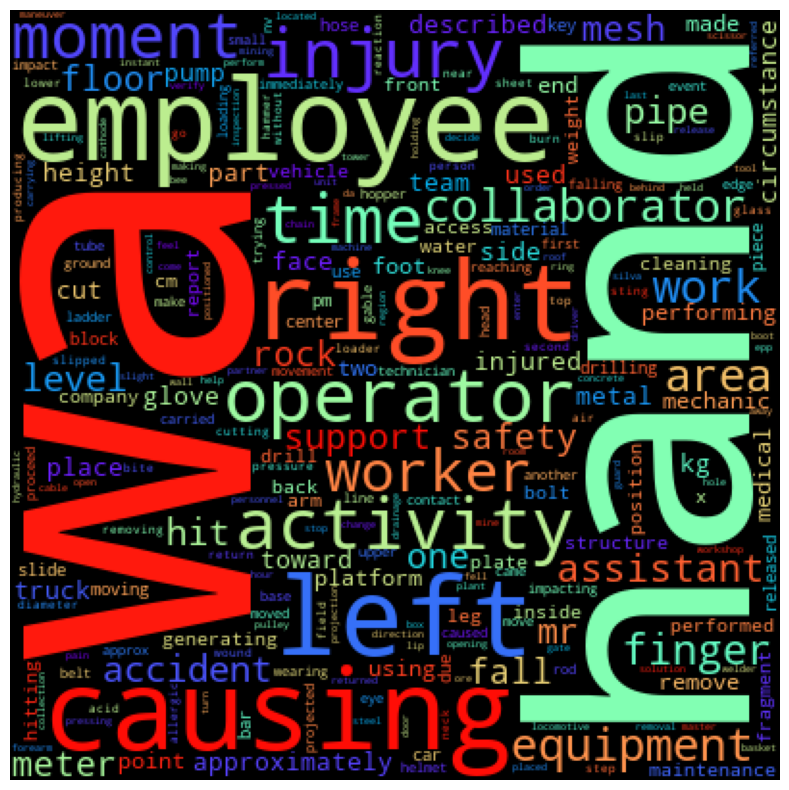

In [77]:
wordcloud = WordCloud(width = 400, height = 400, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=500, collocations=False).generate(" ".join(data['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Observations

There are many body-related, employee related, movement-related, equipment-related and accident-related words.

Body-related: left, right, hand, finger, face, foot and glove

Employee-related: employee, operator, collaborator, assistant, worker and mechanic

Movement-related: fall, hit, lift and slip

Equipment-related: equipment, pump, meter, drill, truck and tube

Accident-related: accident, activity, safety, injury, causing

Lets check the length of the text examples

In [78]:
# Get length of each line
data['line_length'] = data['Cleaned_Description'].str.len()

print('Minimum line length: {}'.format(data['line_length'].min()))
print('Maximum line length: {}'.format(data['line_length'].max()))

# Get the Number of words of each line
data['words'] = data['Cleaned_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['words'].min()))
print('Maximum number of words: {}'.format(data['words'].max()))


Minimum line length: 65
Maximum line length: 681
Minimum number of words: 10
Maximum number of words: 105


###### Observations :

Now we know that strings of text (length of text) in our examples are vary between 65 and 681

Now we know that number of words in our examples are vary between 10 and 105

###### Following NLP pre-processing steps taken before applying model on the data:

Converting to lower case, avoid any capital cases

Converting apostrophe to the standard lexicons

Removing punctuations

Lemmatization

Removing stop words

After pre-processing steps:

Minimum line length: 65

Maximum line length: 681

Minimum number of words: 10

Maximum number of words: 105

#### Feature Engineering

Variable Creation - Word2Vec Embeddings

In [79]:
from gensim.models import Word2Vec
# define training data
sentences = data['Cleaned_Description']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=48, vector_size=100, alpha=0.025>
[' ', 'e', 'a', 'i', 'r', 't', 'n', 'o', 'l', 'c', 's', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'w', 'y', 'b', 'v', 'k', '0', '1', 'x', 'j', '2', '5', '4', '3', 'q', '8', '7', '6', 'z', '9', '\u200b', '°', 'á', 'é', 'ã', 'ó', 'â', 'í', '¼', 'ô', 'ú']
Word2Vec<vocab=48, vector_size=100, alpha=0.025>


In [81]:
#from google.colab import drive
#drive.mount('/content/drive/')


In [84]:
Path = '/Users/apple/Github/NLP/glove/glove.6B.200d.txt'

Variable Creation - Glove Word Embeddings


In [85]:
embeddings_index = {}
EMBEDDING_FILE = Path
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:16, 23748.60it/s]

Found 400000 word vectors.


In [86]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [87]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(data['Cleaned_Description'])]

100%|███████████████████████████████████████| 418/418 [00:00<00:00, 2516.98it/s]


In [88]:
# lets check example of any embedding

ind_glove_df[15]

array([ 7.45040551e-03,  1.37660280e-03,  8.52457900e-03, -4.57151458e-02,
        1.68496359e-03, -1.92093942e-02, -1.05075955e-01,  9.45039093e-03,
       -2.76445877e-02, -5.86851174e-03,  3.35901827e-02,  3.50105539e-02,
        7.88884703e-03,  2.68178340e-02,  1.08031504e-01,  7.24408589e-03,
       -5.24450094e-02,  7.15975463e-02,  2.48730611e-02, -1.54494522e-02,
        3.24971676e-02,  6.55774236e-01, -3.26196067e-02,  9.95526370e-03,
        7.07168579e-02, -2.12823600e-03, -7.12571740e-02,  1.10877184e-02,
       -5.12187183e-02, -3.51177566e-02,  5.90129988e-03, -6.34210482e-02,
       -3.56112979e-02,  5.27550094e-02,  5.45851253e-02, -5.48089184e-02,
       -5.27943708e-02, -8.46062303e-02, -1.63435638e-02,  2.03639735e-02,
        3.36221009e-02, -2.35471651e-02, -3.92388552e-02,  1.43134430e-01,
       -1.46269081e-02, -5.04024141e-02,  3.43247391e-02, -3.47312726e-02,
        2.82324422e-02,  5.39113916e-02, -2.35024747e-03,  3.16991434e-02,
       -7.36864507e-02,  

Variable Creation - TFIDF Features

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

ind_tfidf_df = pd.DataFrame()

for i in range(1, 6):
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(data['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names_out()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)



In [90]:
# Lets see ind_tfidf_df with TF-IDF features
ind_tfidf_df.head(10)

,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,TFIDF_wa,TFIDF_causing injury,TFIDF_described injury,TFIDF_employee report,TFIDF_employee wa,TFIDF_finger left,TFIDF_injury described,TFIDF_left hand,TFIDF_right hand,TFIDF_time accident,TFIDF_wa wearing,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_time accident employee,TFIDF_wa wearing safety,TFIDF_worker wa wearing,TFIDF_described injury time accident,TFIDF_finger left hand causing,TFIDF_generating injury time accident,TFIDF_hand generating described injury,TFIDF_place clerk wa wearing,TFIDF_reaction returned normal activity,TFIDF_type allergic reaction returned,TFIDF_verified wa type allergic,TFIDF_wa type allergic reaction,TFIDF_worker wa wearing safety,TFIDF_accident worker wa wearing safety,TFIDF_allergic reaction returned normal activity,TFIDF_glove enter forest area wa,TFIDF_highway access aripuanã area stopped,TFIDF_quickly hurried vehicle moving away,TFIDF_stopped got vehicle point identified,TFIDF_time accident worker wa wearing,TFIDF_type allergic reaction returned normal,TFIDF_verified wa type allergic reaction,TFIDF_wa type allergic reaction returned
0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.439889,0.000000,0.460622,0.516854,0.463749,0.000000,0.000000,0.0,0.334850,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.343861,0.000000,0.720136,0.404024,0.362512,0.000000,0.000000,0.0,0.261752,0.719151,0.0,0.0,0.0,0.0,0.000000,0.694854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.495134,0.000000,0.000000,0.581766,0.000000,0.000000,0.523769,0.0,0.376903,0.602238,0.0,0.0,0.0,0.0,0.798317,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.814000,0.000000,0.546350,0.000000,0.000000,0.0,0.197246,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.806976,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.590585,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.000000,0.000000,0.000000,0.638807,0.769367,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Variable Creation - Label Encoding

In [91]:
# To replace white space everywhere in Employee type
data['Employee type'] = data['Employee type'].str.replace(' ', '_')
data['Employee type'].value_counts()

Employee type
Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: count, dtype: int64

In [92]:
# To replace white space everywhere in Critical Risk
data['Critical Risk'] = data['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
data['Critical Risk'].value_counts().head()

Critical Risk
Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: count, dtype: int64

In [93]:
# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()
from sklearn.preprocessing import LabelEncoder
# Label encoding
data['Season'] = data['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
ind_featenc_df['Season'] = LabelEncoder().fit_transform(data['Season']).astype(np.int8)

data['Weekday'] = data['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(data['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(data['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(data['Potential Accident Level']).astype(np.int8)

In [94]:
# convert integers to dummy variables (i.e. one hot encoded)
from tensorflow.keras.utils import to_categorical
dummy_y = to_categorical(ind_featenc_df['Accident Level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [95]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(data['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(data['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(data['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(data['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(data['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(data['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = data[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,CR_Not_applicable,CR_Others,CR_Plates,CR_Poll,CR_Power_lock,CR_Pressed,CR_Pressurized_Systems,CR_Pressurized_Systems_/_Chemical_Substances,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco
0,2016,1,1,53,0,4,0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2016,1,2,53,0,5,0,3,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,2016,1,6,1,0,2,0,2,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Combine Glove and Encoded Features

In [96]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))
ind_feat_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,CR_Not_applicable,CR_Others,CR_Plates,CR_Poll,CR_Power_lock,CR_Pressed,CR_Pressurized_Systems,CR_Pressurized_Systems_/_Chemical_Substances,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,2016,1,1,53,0,4,0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.006887,0.093703,-0.001941,-0.036895,0.001877,0.058040,-0.097704,-0.030162,-0.054457,0.044740,-0.019328,0.017293,0.109758,0.000492,0.098544,-0.034143,-0.030600,-0.030257,0.066539,0.000337,-0.035214,0.613469,0.084240,0.003746,0.039104,0.045682,-0.033115,0.026571,-0.031660,-0.065803
1,2016,1,2,53,0,5,0,3,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,-0.025655,0.043431,0.042790,-0.085947,-0.003799,0.013487,-0.101637,-0.049340,-0.054736,-0.027815,0.041527,-0.005691,0.032738,0.000704,0.017490,-0.002890,-0.063193,0.025598,0.125676,-0.070120,-0.081701,0.570851,-0.073251,-0.069262,0.151261,-0.090150,-0.092864,-0.001933,-0.001070,0.055066
2,2016,1,6,1,0,2,0,2,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.011042,-0.051040,-0.099808,-0.072641,-0.031036,0.013921,-0.085773,-0.049544,-0.064268,-0.014147,0.004490,-0.023850,-0.005743,0.083321,0.119378,-0.002893,-0.042918,-0.000703,0.005597,-0.036258,-0.004663,0.588262,0.059615,-0.018175,0.063658,0.006242,-0.024160,0.000285,-0.081324,-0.085275


Combine TFIDF and Encoded Features

In [97]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))
ind_feat_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,CR_Not_applicable,CR_Others,CR_Plates,CR_Poll,CR_Power_lock,CR_Pressed,CR_Pressurized_Systems,CR_Pressurized_Systems_/_Chemical_Substances,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,TFIDF_wa,TFIDF_causing injury,TFIDF_described injury,TFIDF_employee report,TFIDF_employee wa,TFIDF_finger left,TFIDF_injury described,TFIDF_left hand,TFIDF_right hand,TFIDF_time accident,TFIDF_wa wearing,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_time accident employee,TFIDF_wa wearing safety,TFIDF_worker wa wearing,TFIDF_described injury time accident,TFIDF_finger left hand causing,TFIDF_generating injury time accident,TFIDF_hand generating described injury,TFIDF_place clerk wa wearing,TFIDF_reaction returned normal activity,TFIDF_type allergic reaction returned,TFIDF_verified wa type allergic,TFIDF_wa type allergic reaction,TFIDF_worker wa wearing safety,TFIDF_accident worker wa wearing safety,TFIDF_allergic reaction returned normal activity,TFIDF_glove enter forest area wa,TFIDF_highway access aripuanã area stopped,TFIDF_quickly hurried vehicle moving away,TFIDF_stopped got vehicle point identified,TFIDF_time accident worker wa wearing,TFIDF_type allergic reaction returned normal,TFIDF_verified wa type allergic reaction,TFIDF_wa type allergic reaction returned
0,2016,1,1,53,0,4,0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,2,53,0,5,0,3,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1,6,1,0,2,0,2,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.439889,0.0,0.460622,0.516854,0.463749,0.0,0.0,0.0,0.33485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

##### Train test **split**

In [98]:
X = ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Accident Level']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [100]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)

In [101]:
# lets check the shape of our samples
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,106)
y_train shape : (334,)
X_test shape : (84,106)
y_test shape : (84,)


Lets set the class level in our target class

Resampling Techniques — Oversample minority class

In [116]:
# Display old accident level counts
ind_feat_df['Accident Level'].value_counts()

Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create an instance of the StandardScaler class
scaler_X = StandardScaler()

# Create a pipeline for scaling
pipeline = Pipeline(steps=[('s', scaler_X)])

# Apply scaling to the selected features (assuming they are the first 6 columns)
X_train.iloc[:, :6] = pipeline.fit_transform(X_train.iloc[:, :6])


PCA to reduce the features

In [130]:
new_value_for_cov = (X_train.values.T)
new_value_for_cov = np.array(new_value_for_cov, dtype=np.float64)

In [131]:
# generating the covariance matrix and the eigen values for the PCA analysis
#cov_matrix = np.cov((X_train.values).T) # the relevanat covariance matrix
cov_matrix = np.cov(new_value_for_cov)
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -4.20879813e-03
  -4.20879813e-03 -4.20879813e-03]
 [-4.24727770e-01  1.00300300e+00  2.68776694e-02 ...  3.64409565e-04
   3.64409565e-04  3.64409565e-04]
 [ 2.53271550e-02  2.68776694e-02  1.00300300e+00 ...  1.04227440e-03
   1.04227440e-03  1.04227440e-03]
 ...
 [-4.20879813e-03  3.64409565e-04  1.04227440e-03 ...  2.96703890e-03
   2.96703890e-03  2.96703890e-03]
 [-4.20879813e-03  3.64409565e-04  1.04227440e-03 ...  2.96703890e-03
   2.96703890e-03  2.96703890e-03]
 [-4.20879813e-03  3.64409565e-04  1.04227440e-03 ...  2.96703890e-03
   2.96703890e-03  2.96703890e-03]]
Eigenvectors 
[[-3.52865256e-01+0.j -6.92193679e-03+0.j -2.40995628e-01+0.j ...
  -1.05941772e-45+0.j  5.68868283e-62+0.j  0.00000000e+00+0.j]
 [ 5.64531179e-01+0.j  2.06765048e-02+0.j -1.52138804e-02+0.j ...
  -9.58490518e-18+0.j  8.98281928e-18+0.j  0.00000000e+00+0.j]
 [ 2.63588787e-02+0.j  6.18842601e-01+0.j -7.46150327e-01+0.j ...
  -7

In [132]:
# the "cumulative variance explained" analysis
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.74101848+0.00000000e+00j  39.93290332+0.00000000e+00j
  49.82768113+0.00000000e+00j  57.73437106+0.00000000e+00j
  63.48211565+0.00000000e+00j  68.47927447+0.00000000e+00j
  72.59153915+0.00000000e+00j  74.91862359+0.00000000e+00j
  76.77612783+0.00000000e+00j  78.52425866+0.00000000e+00j
  80.00115255+0.00000000e+00j  81.32153144+0.00000000e+00j
  82.51312116+0.00000000e+00j  83.66498982+0.00000000e+00j
  84.72613626+0.00000000e+00j  85.69985279+0.00000000e+00j
  86.54919984+0.00000000e+00j  87.34803421+0.00000000e+00j
  88.05652145+0.00000000e+00j  88.72694518+0.00000000e+00j
  89.34457418+0.00000000e+00j  89.93826193+0.00000000e+00j
  90.50775129+0.00000000e+00j  91.0487627 +0.00000000e+00j
  91.56128811+0.00000000e+00j  92.02337711+0.00000000e+00j
  92.45156024+0.00000000e+00j  92.84586002+0.00000000e+00j
  93.21472965+0.00000000e+00j  93.56083636+0.00000000e+00j
  93.90423559+0.00000000e+00j  94.2316273 +0.00000000e+00j
  94.53383142+0.00000000e+

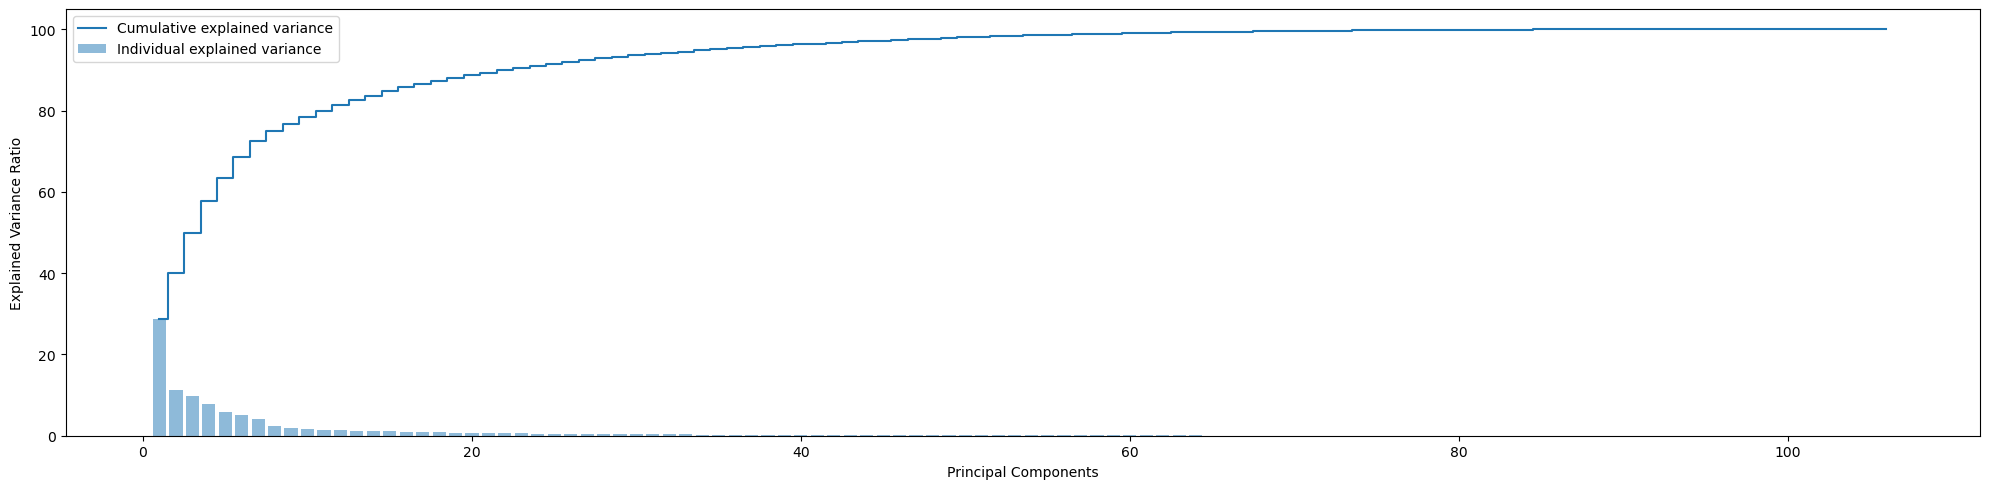

In [133]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [134]:
# Capturing 90% variance of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print(X_train_reduced.shape)
print(X_test_reduced.shape)


(334, 23)
(84, 23)


Lets check all variations of Train and test data

In [135]:
print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_test_reduced:",X_test_reduced.shape)

print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

Shape of X_train_reduced: (334, 23)
Shape of X_test_reduced: (84, 23)
X_train shape : (334,106)
y_train shape : (334,)
X_test shape : (84,106)
y_test shape : (84,)


### Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
Dtree = DecisionTreeClassifier(criterion="gini", random_state=1)

In [139]:
Dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [140]:
print(Dtree.score(X_train, y_train))
print(Dtree.score(X_test, y_test))

0.9940119760479041
0.5


In [141]:
from sklearn.tree import export_graphviz

train_char_label = ['I','II','III','IV','V']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(Dtree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [142]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 32512


sh: dot: command not found


In [143]:
Dtree_1 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)
Dtree_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [147]:
print(Dtree_1.score(X_train, y_train))
print(Dtree_1.score(X_test, y_test))

0.7724550898203593
0.7261904761904762


In [148]:
#(Dtree_1.feature_importances_, index= X_train.columns)
#y_test_array = np.array(y_test)
y_pred_Dtree_1 = Dtree_1.predict(X_test)
confusion_Matrix_Dtree_1 = confusion_matrix(y_test, y_pred_Dtree_1)
confusion_Matrix_Dtree_1
df_cm_Dtree_1 = pd.DataFrame(confusion_Matrix_Dtree_1, index=[i for i in ['I','II','III','IV','V']], columns=[i for i in ['I','II','III','IV','V']])

Accuracy Score : 0.7261904761904762


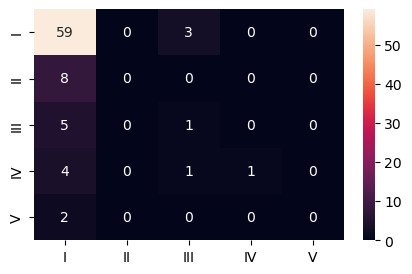

In [149]:
plt.figure(figsize=(5,3))
sns.heatmap(df_cm_Dtree_1, annot=True, fmt="g")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_Dtree_1)}")

In [167]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [151]:
bag_clf = BaggingClassifier(base_estimator=Dtree, n_estimators=50, random_state=1)

In [152]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=50, random_state=1)

Accuracy Score : 0.6428571428571429


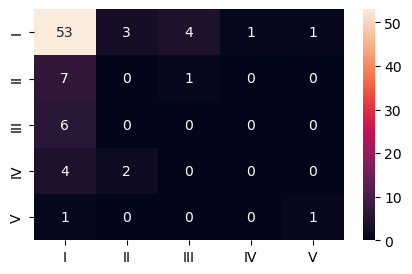

In [153]:
y_pred_bag_clf = bag_clf.predict(X_test)
confusion_Matrix_bag_clf = confusion_matrix(y_test, y_pred_bag_clf)
df_cm_bag_clf = pd.DataFrame(confusion_Matrix_bag_clf, index=[i for i in ['I','II','III','IV','V']], columns=[i for i in ['I','II','III','IV','V']] )
plt.figure(figsize=(5,3))
sns.heatmap(df_cm_bag_clf, annot=True, fmt="g")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_bag_clf)}")

The above model has an improved accuracy and predicts, the "V" label, however the other model did not.

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
Rfcl = RandomForestClassifier(n_estimators=30, random_state=1, max_features=10)

In [156]:
Rfcl

RandomForestClassifier(max_features=10, n_estimators=30, random_state=1)

In [157]:
Rfcl.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=30, random_state=1)

In [158]:
y_pred_RFCL = Rfcl.predict(X_test)

In [159]:
confusion_matrix_Rfpl = confusion_matrix(y_test, y_pred_RFCL)
df_cm_Rfpl = pd.DataFrame(confusion_matrix_Rfpl, index=[i for i in ['I','II','III','IV','V']], columns=[i for i in ['I','II','III','IV','V']] )

Accuracy score : 0.7142857142857143


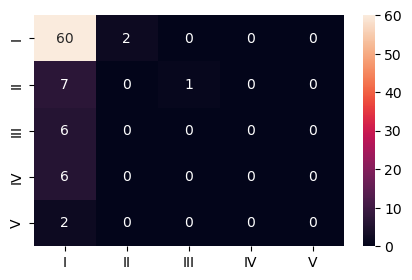

In [160]:
plt.figure(figsize=(5,3))
sns.heatmap(df_cm_Rfpl, annot=True, fmt="g")
print(f"Accuracy score : {accuracy_score(y_test, y_pred_RFCL)}")

In [161]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 5: Fit the model to the training data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [162]:
y_pred_gb = gb_classifier.predict(X_test)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)

Accuracy score : 0.4166666666666667


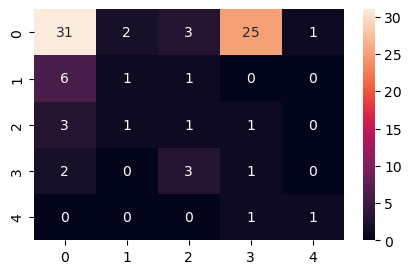

In [163]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix_gb, annot=True, fmt="g")
print(f"Accuracy score : {accuracy_score(y_test, y_pred_gb)}")

In [168]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
cs = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring="accuracy")


(array([2., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0.68181818, 0.68677069, 0.6917232 , 0.69667571, 0.70162822,
        0.70658073, 0.71153324, 0.71648575, 0.72143826, 0.72639077,
        0.73134328]),
 <BarContainer object of 10 artists>)

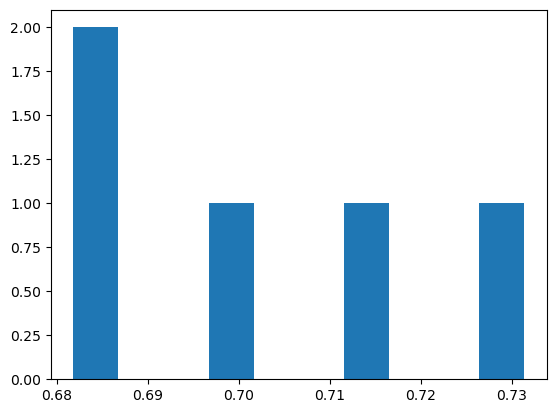

In [169]:
plt.hist(cs)

In [170]:
SVM_avg = np.average(cs)
SVM_avg

0.7035278154681139

###Results with TFIDF

In [171]:
data1 = {"Model" : ["Gradient Boost", "Bagging Classifier", "Random Forest", "SVM", "Decision Tree"],
        "Score" : [ accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_bag_clf), accuracy_score(y_test, y_pred_RFCL), SVM_avg, accuracy_score(y_test, y_pred_Dtree_1)]}
tfid_results = pd.DataFrame(data1)
tfid_results

,Model,Score
0,Gradient Boost,0.416667
1,Bagging Classifier,0.642857
2,Random Forest,0.714286
3,SVM,0.703528
4,Decision Tree,0.726190


# 2. Milestone 2: [ Score: 60 points ]
### ‣ Input: Preprocessed output from Milestone-1

### ‣ Process:
### ‣ Step 1: Design, train and test Neural networks classifiers [ 5 points ]

In [172]:
# # lets build the sequential model here-
# # fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)
# tf.random.set_seed(seed)

# # define the model
# model = Sequential()
# model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# # model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(1, activation='linear'))

# # compile the keras model
# #opt = optimizers.Adam(lr=1e-3)
# opt = SGD(lr=0.001, momentum=0.9)
# model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# # Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
# rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1e-4)

# # fit the keras model on the dataset
# training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])



In [173]:
# model.summary()

In [174]:
# # evaluate the keras model
# _, accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
# print('Test accuracy: %.2f' % (accuracy*100))

In [175]:
# epochs = range(len(training_history.history['loss'])) # Get number of epochs

# # plot loss learning curves
# plt.plot  (epochs, training_history.history['loss'], label = 'train')
# plt.plot  (epochs, training_history.history['val_loss'], label = 'val')
# plt.legend(loc = 'upper right')
# plt.title ('Training and validation loss')

#### Lets define few functions to perform the tasks that we will use in training phase



#### Defining a General function to Get the accuracy, precision, recall, f1 score from model. This can be used with any Model with X_test, y_test and it will give the result

In [176]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):

  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1

#### The reset_random_seeds function: This function sets the random seeds for various libraries, ensuring reproducibility

In [177]:
import os
os.environ['PYTHONHASHSEED']=str(7)

# Reproduce the results
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(7)
   #np.random.seed(7)
   #random.seed(7)
   tf.random.set_seed(7)


#### Defining a function to check Accuracy, precision, recall and F1 score during traininga nd at the end of every Epoch, this will work with Validation data during the time of training.

In [181]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel


        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

In [232]:
from keras.layers import Dropout, BatchNormalization
from sklearn.metrics import f1_score, recall_score, precision_score

In [194]:
from keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [227]:
X_train_01 = (X_train.values)
X_train_01 = np.array(X_train_01, dtype=np.float32)
X_train_01 = X_train_01.astype(np.float32)

In [226]:
X_test_01 = (X_test.values)
X_test_01 = np.array(X_test_01, dtype=np.float32)
X_test_01 = X_test_01.astype(np.float32)

In [228]:
type(y_test_dummy)

numpy.ndarray

In [233]:
# fix random seed for reproducibility
reset_random_seeds()
param = 1e-4

# define the model
model = Sequential()

# Here i'm usig the train Dimensions (number of examples in train data), this is a generalised model.
# The weight initializer  regularizer and activation function can be set as per requirement of the model.
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu',))# kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                #kernel_constraint=unit_norm()))

# Using Dropout and Batch normalization, based on result will change the value further
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu')), #kernel_initializer='he_uniform')) #, kernel_regularizer=l2(param),
                #kernel_constraint=unit_norm()))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax',)) # kernel_regularizer=l2(param),
                #kernel_constraint=unit_norm())) # Multilabel

# compile the keras model

opt = SGD(learning_rate=0.001, momentum=0.5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_01, y_train_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train_01, y_train_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test_01, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 1s 10ms/step - loss: 1.9509 - categorical_accuracy: 0.2066 - val_loss: 372.0834 - val_categorical_accuracy: 0.0714 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 1.8167 - categorical_accuracy: 0.2275 - val_loss: 467.7468 - val_categorical_accuracy: 0.0714 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 1.7152 - categorical_accuracy: 0.2844 - val_loss: 573.3931 - val_categorical_accuracy: 0.0714 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 1.7555 - categorical_accuracy: 0.2754 - val_loss: 687.5992 - val_categorical_accuracy: 0.0714 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 1.6204 - categorical_accuracy: 0.3413 - val_loss: 756.9111 - val_categorical_accuracy: 0.0714 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5976 - categorical_accur

Epoch 31/100
42/42 [==============================] - 0s 4ms/step - loss: 1.5834 - categorical_accuracy: 0.3802 - val_loss: 854.3270 - val_categorical_accuracy: 0.0714 - lr: 1.0000e-23
Epoch 32/100
42/42 [==============================] - 0s 4ms/step - loss: 1.5756 - categorical_accuracy: 0.3713 - val_loss: 834.9704 - val_categorical_accuracy: 0.0714 - lr: 1.0000e-27
Epoch 33/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5572 - categorical_accuracy: 0.3443 - val_loss: 894.3292 - val_categorical_accuracy: 0.0714 - lr: 1.0000e-27
Epoch 34/100
42/42 [==============================] - 0s 5ms/step - loss: 1.6083 - categorical_accuracy: 0.3234 - val_loss: 792.7464 - val_categorical_accuracy: 0.0714 - lr: 1.0000e-27
Epoch 35/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5846 - categorical_accuracy: 0.3832 - val_loss: 824.8390 - val_categorical_accuracy: 0.0714 - lr: 1.0000e-27
Epoch 36/100
42/42 [==============================] - 0s 5ms/step - loss: 1

Epoch 61/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5868 - categorical_accuracy: 0.3982 - val_loss: 737.6357 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 62/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5881 - categorical_accuracy: 0.3743 - val_loss: 788.2858 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 63/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5396 - categorical_accuracy: 0.3653 - val_loss: 794.2532 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 64/100
42/42 [==============================] - 0s 4ms/step - loss: 1.5520 - categorical_accuracy: 0.3772 - val_loss: 776.2198 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 65/100
42/42 [==============================] - 0s 4ms/step - loss: 1.5423 - categorical_accuracy: 0.3772 - val_loss: 773.8253 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 66/100
42/42 [==============================] - 0s 5ms/step - loss: 1

Epoch 91/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5870 - categorical_accuracy: 0.3772 - val_loss: 830.7704 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 92/100
42/42 [==============================] - 0s 5ms/step - loss: 1.6027 - categorical_accuracy: 0.3563 - val_loss: 805.0229 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 93/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5745 - categorical_accuracy: 0.3593 - val_loss: 804.3182 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 94/100
42/42 [==============================] - 0s 5ms/step - loss: 1.6161 - categorical_accuracy: 0.3114 - val_loss: 796.0970 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 95/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5846 - categorical_accuracy: 0.3413 - val_loss: 775.7507 - val_categorical_accuracy: 0.0714 - lr: 0.0000e+00
Epoch 96/100
42/42 [==============================] - 0s 4ms/step - loss: 1

In [235]:
#print(type(X_train_01))
#print(type(y_train_dummy))
#print(type(X_test_01))
#print(type(y_test_dummy))

In [236]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10)                1070      
                                                                 
 dropout_30 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_29 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
 dropout_31 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_30 (Ba  (None, 10)                40        
 tchNormalization)                                   

In [239]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train_01, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test_01, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 55.99
Test accuracy: 7.14


In [241]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test_01, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 [==============================] - 0s 2ms/step
Accuracy: 0.071429
Precision: 0.071429
Recall: 0.071429
F1 score: 0.071429


Text(0.5, 1.0, 'Training and validation loss')

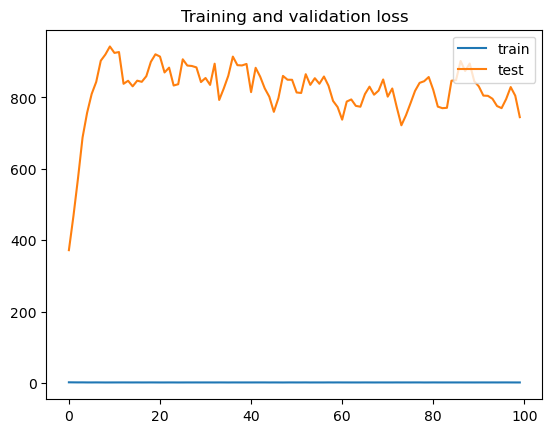

In [242]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

## ‣ Step 2: Design, train and test RNN or LSTM classifiers [ 10 points ]

### I will try following architectures
##### model with Text inputs only.
##### model with Categorical inputs only.
##### model with Multiple inputs.

In [243]:
data

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday,Cleaned_Description,line_length,words
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third_Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,eFriday,53,aSummer,1,removing drill rod jumbo 08 maintenance superv...,279,38
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized_Systems,During the activation of a sodium sulphide pum...,2016,1,2,fSaturday,53,aSummer,0,activation sodium sulphide pump piping wa unco...,216,31
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third_Party_(Remote),Manual_Tools,In the sub-station MILPO located at level +170...,2016,1,6,cWednesday,1,aSummer,0,substation milpo located level 170 collaborato...,206,31
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third_Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,eFriday,1,aSummer,0,945 approximately nv 1880 cx695 ob7 personnel ...,365,52
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third_Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,gSunday,1,aSummer,0,approximately 1145 circumstance mechanic antho...,328,49
5,2016-01-12,Country_02,Local_05,Metals,I,III,Male,Third_Party_(Remote),Pressurized_Systems,During the unloading operation of the ustulado...,2016,1,12,bTuesday,2,aSummer,0,unloading operation ustulado bag wa need unclo...,221,28
6,2016-01-16,Country_02,Local_05,Metals,I,III,Male,Employee,Fall_prevention_(same_level),The collaborator reports that he was on street...,2016,1,16,fSaturday,2,aSummer,0,collaborator report wa street 09 holding left ...,160,23
7,2016-01-17,Country_01,Local_04,Mining,I,III,Male,Third_Party,Pressed,"At approximately 04:50 p.m., when the mechanic...",2016,1,17,gSunday,2,aSummer,0,approximately 0450 pm mechanic technician josé...,253,33
8,2016-01-19,Country_02,Local_02,Mining,I,IV,Male,Third_Party_(Remote),Others,Employee was sitting in the resting area at le...,2016,1,19,bTuesday,3,aSummer,0,employee wa sitting resting area level 326 rai...,112,16
9,2016-01-26,Country_01,Local_06,Metals,I,II,Male,Third_Party,Chemical_substances,At the moment the forklift operator went to ma...,2016,1,26,bTuesday,4,aSummer,0,moment forklift operator went manipulate big b...,262,36


In [244]:
# 1. Model with Text Inputs Only


# Select input and output features
X_text = data['Cleaned_Description']
y_text = data['Accident Level']


In [245]:
# Encode labels in column 'Accident Level'.
y_text = LabelEncoder().fit_transform(y_text)

In [246]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (334)
y_text_train shape : (334,)
X_text_test shape : (84)
y_text_test shape : (84,)


In [247]:
# Convert both the training and test labels into one-hot encoded vectors:
from keras.utils import to_categorical
y_text_train = to_categorical(y_text_train)
y_text_test = to_categorical(y_text_test)

In [248]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [249]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2870


In [251]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('/Users/apple/Github/NLP/glove/glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [252]:
reset_random_seeds()
from keras.layers import Input, Bidirectional, GlobalMaxPool1D, Concatenate
from tensorflow.keras.models import Model

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [253]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 200)          574000    
                                                                 
 bidirectional (Bidirection  (None, 100, 256)          336896    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_32 (Dropout)        (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               32896 

In [254]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [255]:
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_text_train, y_text_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 7s 108ms/step - loss: 1.2620 - acc: 0.6737 - val_loss: 1.0176 - val_acc: 0.7381 - lr: 0.0100
Epoch 2/100
42/42 [==============================] - 3s 76ms/step - loss: 1.0385 - acc: 0.7395 - val_loss: 0.9926 - val_acc: 0.7381 - lr: 0.0100
Epoch 3/100
42/42 [==============================] - 3s 80ms/step - loss: 0.9781 - acc: 0.7395 - val_loss: 0.9307 - val_acc: 0.7381 - lr: 0.0100
Epoch 4/100
42/42 [==============================] - 3s 80ms/step - loss: 0.9498 - acc: 0.7395 - val_loss: 0.9182 - val_acc: 0.7381 - lr: 0.0100
Epoch 5/100
42/42 [==============================] - 3s 72ms/step - loss: 0.9238 - acc: 0.7395 - val_loss: 0.9175 - val_acc: 0.7381 - lr: 0.0100
Epoch 6/100
42/42 [==============================] - 3s 83ms/step - loss: 0.9216 - acc: 0.7395 - val_loss: 0.9138 - val_acc: 0.7381 - lr: 0.0100
Epoch 7/100
42/42 [==============================] - 3s 75ms/step - loss: 0.9106 - acc: 0.7395 - val_loss: 0.9151 - val_acc: 0.73

42/42 [==============================] - 3s 75ms/step - loss: 0.9006 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 1.0000e-26
Epoch 40/100
42/42 [==============================] - 3s 79ms/step - loss: 0.9036 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 1.0000e-26
Epoch 41/100
42/42 [==============================] - 3s 74ms/step - loss: 0.9058 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 1.0000e-26
Epoch 42/100
42/42 [==============================] - 3s 73ms/step - loss: 0.9052 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 1.0000e-30
Epoch 43/100
42/42 [==============================] - 4s 84ms/step - loss: 0.9085 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 1.0000e-30
Epoch 44/100
42/42 [==============================] - 3s 82ms/step - loss: 0.9078 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 1.0000e-30
Epoch 45/100
42/42 [==============================] - 3s 76ms/step - loss: 0.9090 - acc: 0.7395 - val_loss: 0.914

42/42 [==============================] - 3s 77ms/step - loss: 0.9084 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 78/100
42/42 [==============================] - 3s 80ms/step - loss: 0.9056 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 79/100
42/42 [==============================] - 3s 79ms/step - loss: 0.9052 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 80/100
42/42 [==============================] - 3s 75ms/step - loss: 0.9079 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 81/100
42/42 [==============================] - 3s 81ms/step - loss: 0.9060 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 82/100
42/42 [==============================] - 3s 79ms/step - loss: 0.9062 - acc: 0.7395 - val_loss: 0.9144 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 83/100
42/42 [==============================] - 3s 79ms/step - loss: 0.9028 - acc: 0.7395 - val_loss: 0.914

In [257]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [258]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_text_test, y_text_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 [==============================] - 0s 38ms/step
Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

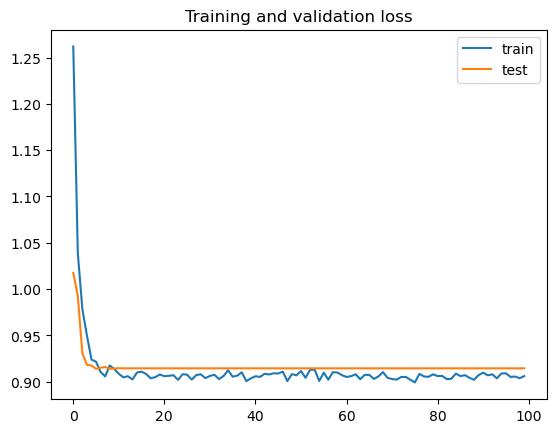

In [259]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

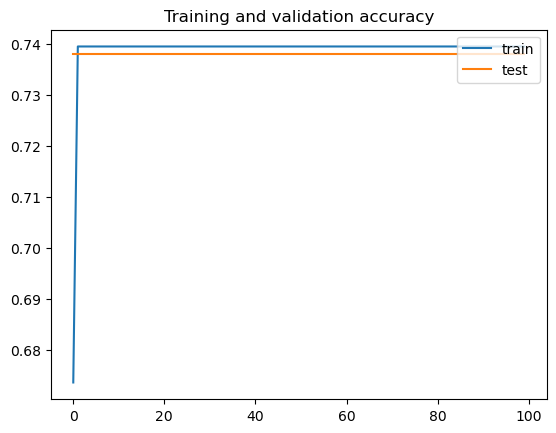

In [260]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

#### 2. Creating a Model with Categorical features Only
In this section, we will create a classification model that uses categorical columns alone. Since the data for these columns is well structured and doesn't contain any sequential or spatial pattern, we can use simple densely connected neural networks to make predictions.

In [261]:
# Select input and output features
X_cat = ind_featenc_df.drop(['Accident Level','Potential Accident Level'], axis = 1)
y_cat = data['Accident Level']

In [262]:
# Encode labels in column 'Accident Level'.
y_cat = LabelEncoder().fit_transform(y_cat)


In [263]:
# Divide our data into testing and training sets:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print('X_cat_train shape : ({0})'.format(X_cat_train.shape[0]))
print('y_cat_train shape : ({0},)'.format(y_cat_train.shape[0]))
print('X_cat_test shape : ({0})'.format(X_cat_test.shape[0]))
print('y_cat_test shape : ({0},)'.format(y_cat_test.shape[0]))

X_cat_train shape : (334)
y_cat_train shape : (334,)
X_cat_test shape : (84)
y_cat_test shape : (84,)


In [264]:
# Convert both the training and test labels into one-hot encoded vectors:
y_cat_train = to_categorical(y_cat_train)
y_cat_test = to_categorical(y_cat_test)

In [265]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler()#StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.fit_transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautres

In [280]:
X_cat_test.shape

(84, 56)

In [286]:
from keras.layers import Dropout, BatchNormalization, Dense

In [291]:
# fix random seed for reproducibility
reset_random_seeds()

param = 1e-4

input2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_1 = Dense(10, input_dim=X_cat_train.shape[1], activation='relu')# kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                #kernel_constraint=unit_norm())(input2)
#drop_out_layer_1 = Dropout(0.2)(dense_layer_1)
batch_norm_layer_1 = BatchNormalization()(drop_out_layer_1)
dense_layer_2 = Dense(10, activation='relu')(batch_norm_layer_1)# kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                #kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_2 = Dropout(0.5)(dense_layer_2)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_2)
dense_layer_3 = Dense(5, activation='softmax')#, kernel_regularizer=l2(param), kernel_constraint=unit_norm())(batch_norm_layer_2)

model = Model(inputs=input2, outputs=dense_layer_3)

# compile the keras model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

ValueError: Input has undefined rank. Received: input_shape=<unknown>

In [276]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 56)]              0         
                                                                 
 dense_16 (Dense)            (None, 10)                570       
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dropout_15 (Dropout)        (None, 10)                0         
                                                           

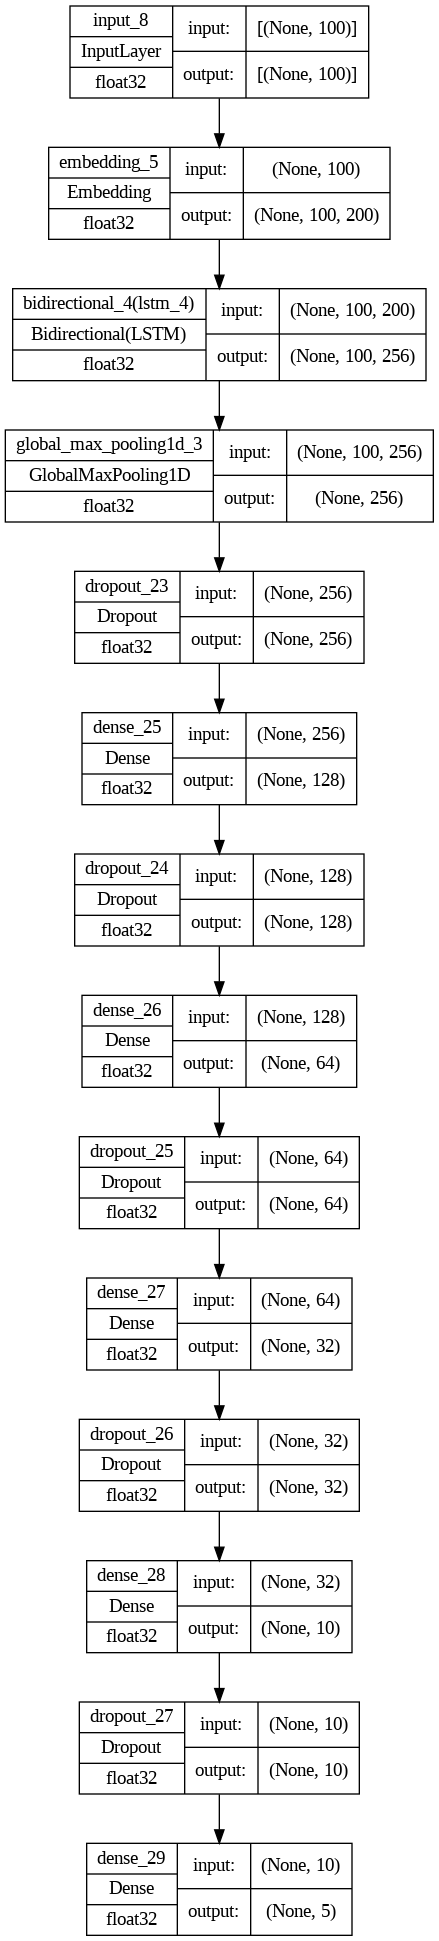

In [288]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [278]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_cat_train, y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_cat_train, y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 2s 18ms/step - loss: 1.3373 - acc: 0.5599 - val_loss: 0.9336 - val_acc: 0.7381 - lr: 0.0100
Epoch 2/100
42/42 [==============================] - 0s 10ms/step - loss: 1.0298 - acc: 0.7335 - val_loss: 0.9225 - val_acc: 0.7381 - lr: 0.0100
Epoch 3/100
42/42 [==============================] - 0s 10ms/step - loss: 0.9436 - acc: 0.7395 - val_loss: 0.9161 - val_acc: 0.7381 - lr: 0.0100
Epoch 4/100
42/42 [==============================] - 0s 11ms/step - loss: 0.9482 - acc: 0.7395 - val_loss: 0.9143 - val_acc: 0.7381 - lr: 0.0100
Epoch 5/100
42/42 [==============================] - 0s 10ms/step - loss: 0.9266 - acc: 0.7395 - val_loss: 0.9138 - val_acc: 0.7381 - lr: 0.0100
Epoch 6/100
42/42 [==============================] - 0s 10ms/step - loss: 0.9144 - acc: 0.7395 - val_loss: 0.9185 - val_acc: 0.7381 - lr: 0.0100
Epoch 7/100
42/42 [==============================] - 0s 10ms/step - loss: 0.9232 - acc: 0.7395 - val_loss: 0.9168 - val_acc: 0.738

In [279]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_cat_train, y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_cat_test, y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [280]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_cat_test, y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 [==============================] - 0s 5ms/step
Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

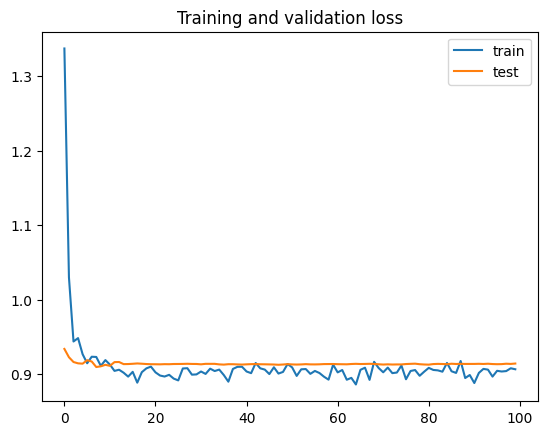

In [281]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

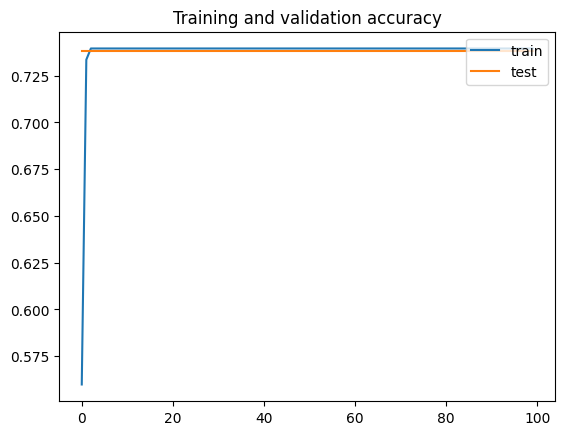

In [282]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [283]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### 3. Creating a Model with Multiple Inputs
The first submodel will accept textual input in the form of accident description. This submodel will consist of an input shape layer, an embedding layer, and bidirectional LSTM layer of 128 neurons followed by max pool layer, drop out and dense layers. The second submodel will accept input in the form of meta information which consists of dense, batch norm and drop out layers.

The output from the dropout layer of the first submodel and the output from the batch norm layer of the second submodel will be concatenated together and will be used as concatenated input to another dense layer with 10 neurons. Finally, the output dense layer will have five neuorns corresponding to each accident level.

In [289]:
# fix random seed for reproducibility
reset_random_seeds()

input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

#-------------------------------------------------------------------------------
param = 1e-4

input_2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                      kernel_constraint=unit_norm())(input_2)
drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [290]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 100, 200)             574000    ['input_9[0][0]']             
                                                                                                  
 bidirectional_5 (Bidirecti  (None, 100, 256)             336896    ['embedding_6[0][0]']         
 onal)                                                                                            
                                                                                                  
 global_max_pooling1d_4 (Gl  (None, 256)                  0         ['bidirectional_5[0][0]'

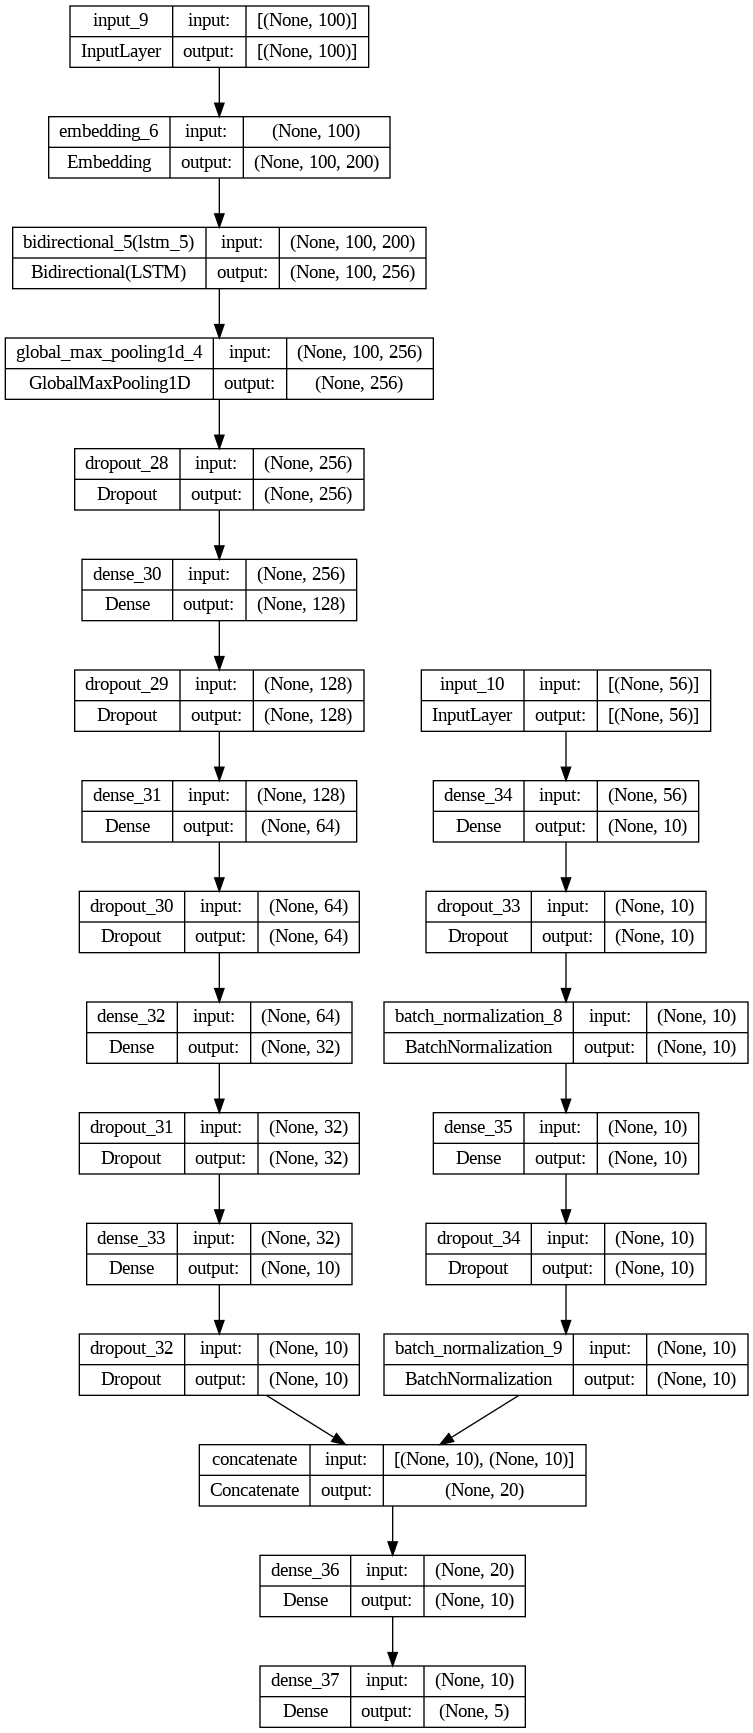

In [291]:
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [292]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit([X_text_train, X_cat_train], y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 16s 113ms/step - loss: 1.2044 - acc: 0.6287 - val_loss: 1.0060 - val_acc: 0.7381 - lr: 0.0100
Epoch 2/100
42/42 [==============================] - 2s 56ms/step - loss: 0.9785 - acc: 0.7395 - val_loss: 1.0342 - val_acc: 0.7381 - lr: 0.0100
Epoch 3/100
42/42 [==============================] - 3s 62ms/step - loss: 0.9539 - acc: 0.7395 - val_loss: 0.9492 - val_acc: 0.7381 - lr: 0.0100
Epoch 4/100
42/42 [==============================] - 3s 61ms/step - loss: 0.9122 - acc: 0.7395 - val_loss: 0.9137 - val_acc: 0.7381 - lr: 0.0100
Epoch 5/100
42/42 [==============================] - 2s 38ms/step - loss: 0.9372 - acc: 0.7395 - val_loss: 0.9044 - val_acc: 0.7381 - lr: 0.0100
Epoch 6/100
42/42 [==============================] - 1s 31ms/step - loss: 0.9312 - acc: 0.7395 - val_loss: 0.8973 - val_acc: 0.7381 - lr: 0.0100
Epoch 7/100
42/42 [==============================] - 1s 25ms/step - loss: 0.9148 - acc: 0.7395 - val_loss: 0.9036 - val_acc: 0.7

In [293]:
# evaluate the keras model
_, train_accuracy = model.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [294]:
accuracy, precision, recall, f1 = get_classification_metrics(model, [X_text_test, X_cat_test], y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 [==============================] - 0s 10ms/step
Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

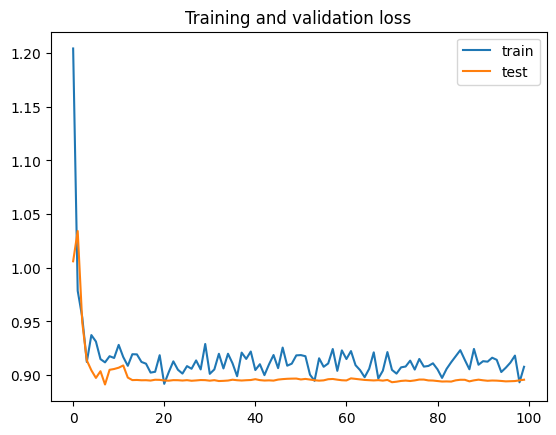

In [295]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

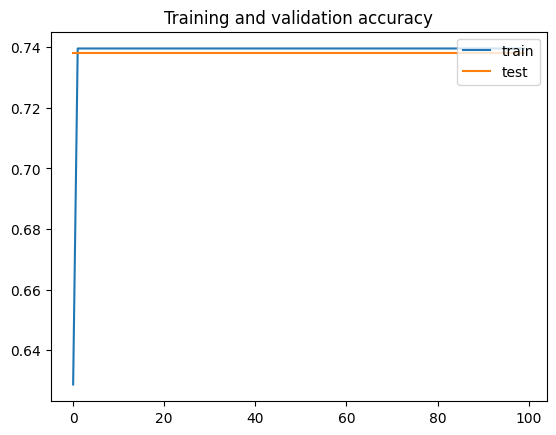

In [296]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

### Observations :

# ‣ Step 3: Choose the best performing classifier and pickle it. [ 5 points ]